# Introduction
Nous basons notre étude sur le rapport de publié par le [World Happiness Report](https://worldhappiness.report) sur le bonheur.  
Les scores obtenus sont obtenus par les enquêtes de **Gallup**, et nous disposons directement de la moyenne pour chaque pays pour chaque année.

- `Life_Ladder`: La **variable à expliquer**. Un score obtenu en demandant aux répondants d'évaluer leur vie sur une échelle de 0 à 10, où 0 est la pire vie possible et 10 l'extrême opposé.
- `Foreign_born`: La note moyenne donnée par les personnes qui ne sont pas originaires du pays.
- `Locally_born`: La note moyenne donnée par les personnes de souche.
- `Whisker.high` et `low`: Les notes maximale et minimale.



Nous utilisons les données à jour des 4 dernières années pour construire nos données pour l'analyse, ils s'agiront de nos **variables endogènes**. Nos données brutes proviennent de:

- **Banque Mondiale**:
    - `GDP_PPP`: Moyenne du PIB par habitant à parité de pouvoir d'achat (PPA) corrigée en dollars internationaux constants de 2011, entre 2015 et 2018 *(2013 - 2016 dans le rapport du WHR)*.
    - `GINI 02-18`: Moyenne de l'indice de GINI de 2002 à 2018 *(2000 - 2016 dans le rapport du WHR)*.
- **Organisation Mondiale de la Santé**:  
    - `HALE_birth`: Espérance de vie en bonne santé à la naissance pour chaque pays, données de l'OMS de 2012. Les données manquantes ont été complétées par les données de la banque mondiale pour la même année.  
- **Gallup World Poll**:  
    - `Social_support`: Moyenne nationale des réponses binaires (0 ou 1) à la question "Si vous aviez des problèmes, avez-vous des parents ou des amis sur lesquels vous pouvez compter pour vous aider quand vous en avez besoin ou non ?"  
    - `Freedom`: Moyenne nationale des réponses binaires à la question "Êtes-vous satisfait ou insatisfait de votre liberté de choisir ce que vous faites de votre vie ?  
    - `Generosity`: Résidu de la régression de la moyenne nationale des réponses à la question " Avez-vous donné de l'argent à un organisme de bienfaisance au cours du dernier mois ?" sur le PIB par habitant.  
    - `Corruption`: Moyenne des réponses binaires à deux questions:  
        - "La corruption est-elle répandue dans tout le gouvernement ou non ?"  
        - "La corruption est-elle répandue dans les entreprises ou non ?"  
    - `Positive_affect` ( resp. `Negative_affect`): Moyenne des mesures de l'effet des jours précédents l'enquête pour le bonheur, le rire et le plaisir (resp. l'inquiétude, la tristesse et la colère).  
    - `Confidence_government`: Moyenne nationale des réponses binaires à la question "Faîtes-vous confiance en votre gouvernement ?"  
    - `GINI_household_income_Gallup`: Mesure de l'indice de GINI pour les ménages du pays en 2017  
    - `Trust_People_Gallup`: Moyenne nationale des réponses binaires à la question "Faîtes-vous confiance à un inconnu ?"  
- **European Social Survey**:  
    - `Democratic_Quality`: Moyenne nationale de la mesure de la qualité de la démocratie sur une échelle de 0 à 10, ramenée à une échelle de -5 à +5  
    - `Delivery_Quality`: Moyenne nationale de la mesure de la prestation du gouvernement sur une échelle de 0 à 10, ramenée à une échelle de -5 à +5  
- **World Value Survey**:  
    - `Trust_people_WVS` pour `05_09` et `10_14`: Moyenne nationale des réponses binaires en 2005-2009, puis en 2010-2014, à la question "Faîtes-vous confiance à un inconnu ?"  
- **World Happiness Report**:  
    - `Region`: Régions utilisées par WHR pour leur analyse

---
Libraries utilisées

In [1]:
if (!require("pacman")) install.packages("pacman")
pacman::p_load(PerformanceAnalytics, ggplot2, gridExtra, reshape)

Loading required package: pacman


In [2]:
brut <- read.csv("brut.csv",
                 sep = ";",
                 header = T,
                 encoding = "UTF-8",
                 dec = ","
                )

region <- read.csv("region.csv",
                   sep = ";",
                   header = T,
                   encoding = "UTF-8"
                  )

citizenship <- read.csv("locally_foreign.csv",
                        sep = ";",
                        header = T,
                        encoding = "UTF-8",
                        dec = ","
                       )

# Statistique descriptive
Dans notre table d'analyse, nous avons pour chaque individu (Pays), ses statistiques obtenues grâce au prétraitement expliqué précédemment.  
Dans cette section, nous analyserons la distribution des variables au sein des individus, la corrélation entre elles.

In [3]:
data <- merge(region,
              merge(citizenship,
                    aggregate(brut[, 3:19], list(brut$Country), mean, na.rm = T),
                    by.x = "Country", by.y = "Group.1"),
              by = "Country")

head(data)

Country,Region,Foreign_born,Whisker.high,Whisker.low,Locally_born,Life_Ladder,GDP_PPP,Social_support,HALE_birth,...,Positive_affect,Negative_affect,Confidence_government,Democratic_Quality,Delivery_Quality,GINI_02_18_WB,GINI_household_income_Gallup,Trust_People_Gallup,Trust_people_WVS_05_09,Trust_people_WVS_10_14
Afghanistan,South Asia,4.068,4.268,3.869,3.853,3.705495,1713.203,0.5162701,52.25455,...,0.5666233,0.3107030,0.3971897,-1.8966928,-1.4765236,NaN,0.3761697,0.2810740,NaN,NaN
Argentina,Latin America and Caribbean,5.843,6.077,5.609,6.440,6.358951,18522.625,0.9056055,67.71538,...,0.8394063,0.2768269,0.3898764,0.2067990,-0.4661795,0.4609375,0.3550522,0.1991232,0.1740575,0.1935307
Armenia,Commonwealth of Independent States,4.101,4.262,3.940,4.418,4.438665,7573.231,0.7137752,65.63077,...,0.5464819,0.4344486,0.3304487,-0.4045399,-0.2156013,0.3192500,0.4109090,0.1566443,NaN,0.1091358
Australia,North America and ANZ,7.249,7.332,7.167,7.324,7.298081,42673.445,0.9485205,72.46667,...,0.8058491,0.2152142,0.5032259,1.1817487,1.7895835,0.3427500,0.4309005,NaN,0.4613790,0.5181401
Austria,Western Europe,6.903,7.076,6.729,7.261,7.249100,44396.501,0.9268618,71.85818,...,0.7911639,0.1732441,0.4237300,1.2874848,1.6374614,0.3026923,0.3306453,0.3006652,NaN,NaN
Azerbaijan,Commonwealth of Independent States,4.735,4.974,4.495,4.923,4.923112,15317.273,0.7617180,63.80000,...,0.5673765,0.2358657,0.7559600,-0.9853211,-0.6862568,0.2110000,0.3062165,0.2740562,NaN,0.1479329


## Distribution du score
Visualisons les **distributions mondiale et régionales** de l'évaluation `Life_Ladder` moyenne des 4 dernières années.  
En effet, le score peut aussi dépendre de la région du monde où les répondants vivent. On remarque que les scores sont tous supérieurs à 5 en Amérique latine, en Europe Occidentale.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 2 rows containing missing values (geom_bar)."`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 2 rows containing missing values (geom_bar)."`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 2 rows containing missing values (geom_bar)."`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 2 rows containing missing values (geom_bar)."`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 2 rows containing missing values (geom_bar)."`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 2 rows containing missing values (geom_bar)."`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 2 rows containing missing values (geom_bar)."`stat_bin()` using `bins = 30`. Pi

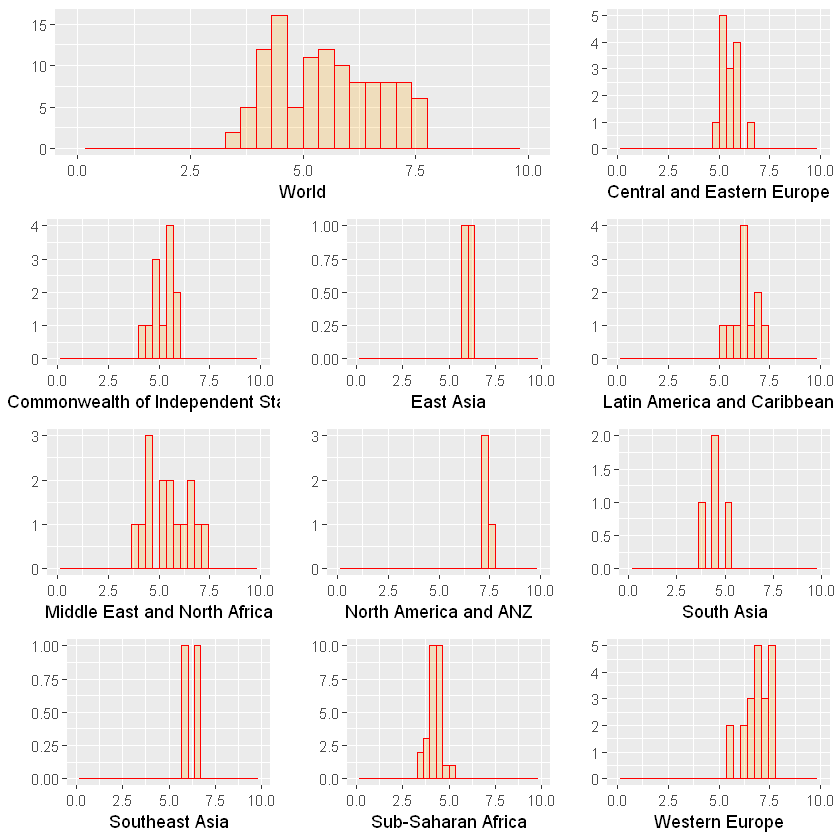

In [4]:
world <- ggplot(data) + aes(x = Life_Ladder) + geom_histogram(color = "red", fill = "orange", 
    alpha = 0.2) + scale_x_continuous(name = "World", limits = c(0, 10)) + ylab("")

region <- vector("list", length = 10)
for (i in 1:length(levels(data$Region))) {
    region[[i]] <- ggplot(data[data$Region == levels(data$Region)[i], ]) +
                    aes(x = Life_Ladder) + 
                    geom_histogram(color = "red", fill = "orange", alpha = 0.2) +
                    scale_x_continuous(name = levels(data$Region)[i],
                                       limits = c(0, 10)) + ylab("")
}

grid.arrange(world, region[[1]],
             region[[2]], region[[3]], region[[4]],
             region[[5]], region[[6]], region[[7]],
             region[[8]], region[[9]], region[[10]],
             ncol = 3, nrow = 4,
             layout_matrix = matrix(c(rep(1,2),2:11), ncol = 3, byrow = T)
             )

Visualisons la **distribution en fonction de l'origine** de `Life_Ladder`.  
La répartition des scores est confondues entre les personnes de souche `Locally_born` et celles non originaires du pays `Foreign_born`. Dans la suite, nous considérerons uniquement `Life_Ladder` donc.

Using  as id variables
Warning message:
"Removed 4 rows containing missing values (geom_bar)."

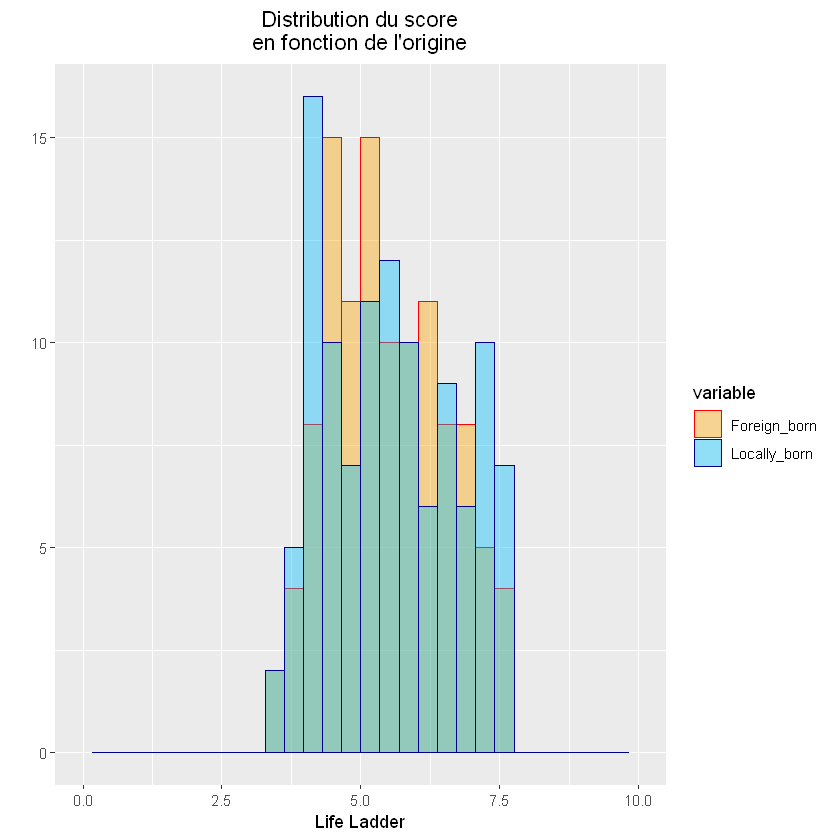

In [51]:
ggplot(melt(data[,c(3,6)]), aes(x = value)) +
    geom_histogram(aes(color = variable, fill = variable),
                   position = "identity",
                   bins = 30, alpha = 0.4) +
    scale_color_manual(values = c("red", "blue4")) +
    scale_fill_manual(values = c("orange", "deepskyblue")) +
    scale_x_continuous(name = "Life Ladder",
                       limits = c(0, 10)) + ylab("") +
    theme(plot.title = element_text(hjust = 0.5)) +
    labs(title = "Distribution du score\nen fonction de l'origine")

## Matrice de corrélation des variables
Visualisons la **matrice de corrélation** entre les variables.

La distribution de chacun des variables figure sur la diagonale. Les nuages de points avec les courbes de tendance, sous la diagonale. Les coefficients de corrélation de Pearson avec les niveaux de significativité, sur la partie supérieure.  
Signif. codes:  0 '\*\*\*' 0.001 '\*\*' 0.01 '\*' 0.05 '.' 0.1 ' ' 1

- Les 8 premières variables endogènes sont significativement corrélées avec `Life_Ladder`.
- `Confidence_government` n'est pas corrélée avec la variable à expliquer, toutefois elle est significativement corrélée avec `Freedom` et `Corruption`.
- Le nuage de points de `Democratic_quality` et `Delivery_quality` démontre un accroissement simultané des deux paramètres et donc d'une forte corrélation positive entre elles. De plus, elles sont significativement corrélées avec la variables à expliquer et les 8 premières variables endogènes.
- Les deux variables de `GINI` possèdent sensiblement la même distribution et sont significativement corrélées. `GINI_household` est la plus corrélée à la variable à expliquer.
- Les trois variables de `Trust_People` sont distribuées de la même manière et sont fortement corrélées entre elles. `Trust_People_WVS_05_09` est la plus corrélée à `Life_Ladder`.

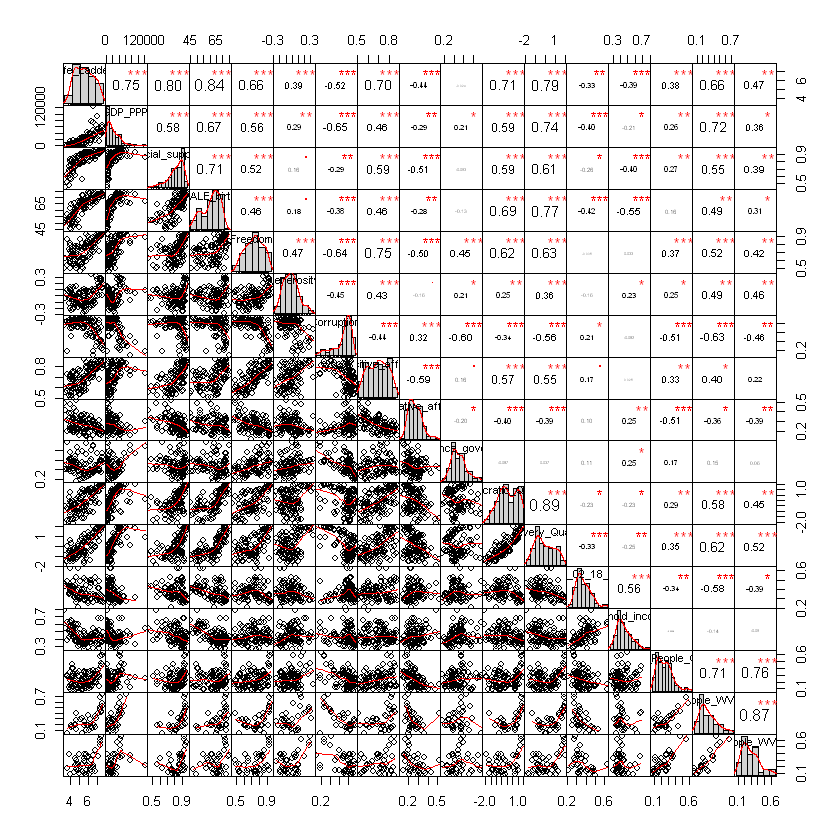

In [5]:
chart.Correlation(data[,7:length(data)],
                  histogram = T)

## Répartition des variables de sondage
Visualisons la répartition des variables explicatives obtenues par sondage.  
Les interprétations de la matrice de corrélation s'appliquent à cette représentation.  
Les variables `Democratic_Quality` et `Delivery_Quality` sont sensiblement réparties de la même manière.  
Lors de l'optimisation de nos modèles, nous choisirons parmis les variables semblablement réparties (`GINI` et `Trust`), celles qui sont les plus corrélées à `Life_Ladder`.

Using  as id variables
Warning message:
"Removed 177 rows containing non-finite values (stat_boxplot)."

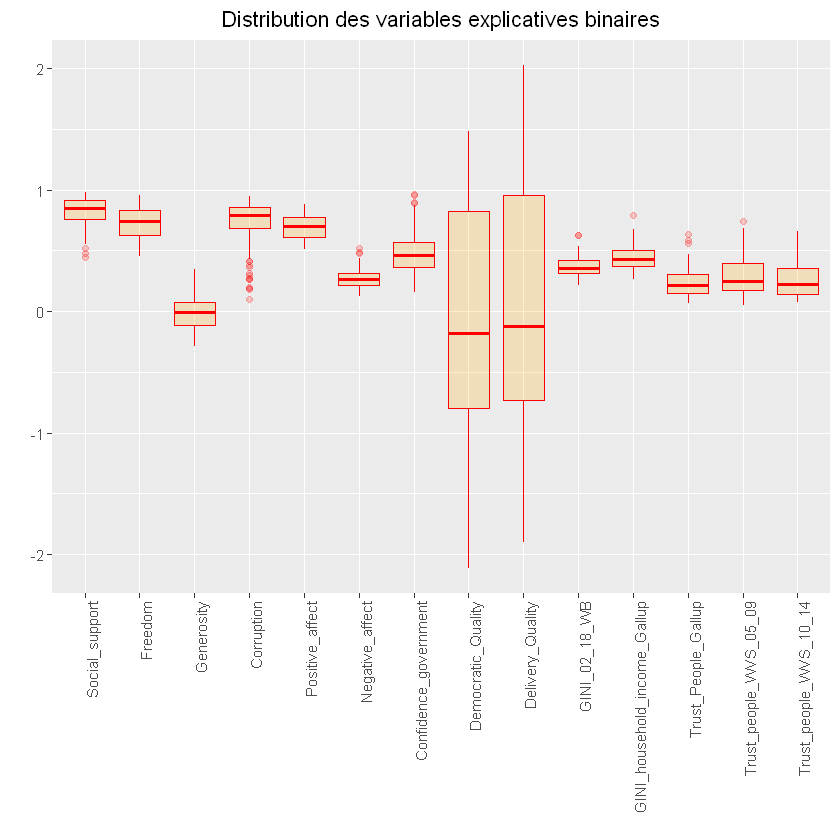

In [6]:
ggplot(melt(data[, c(9, 11:length(data))]),
       aes(x = variable, y = value)) +
    geom_boxplot(color = "red", fill = "orange", alpha = 0.2) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1),
          plot.title = element_text(hjust = 0.5)) +
    labs(title = "Distribution des variables explicatives de sondage",
         x = "", y = "")

## Nuage de points et tendance
Dans la matrice de corrélation précédente, on remarque une tendance exponentielle entre `Life_Ladder`~`GDP_PPP`.  
L'utilisation du logarithme naturel de `GDP_PPP` correspond beaucoup mieux aux données de `Life_Ladder`.

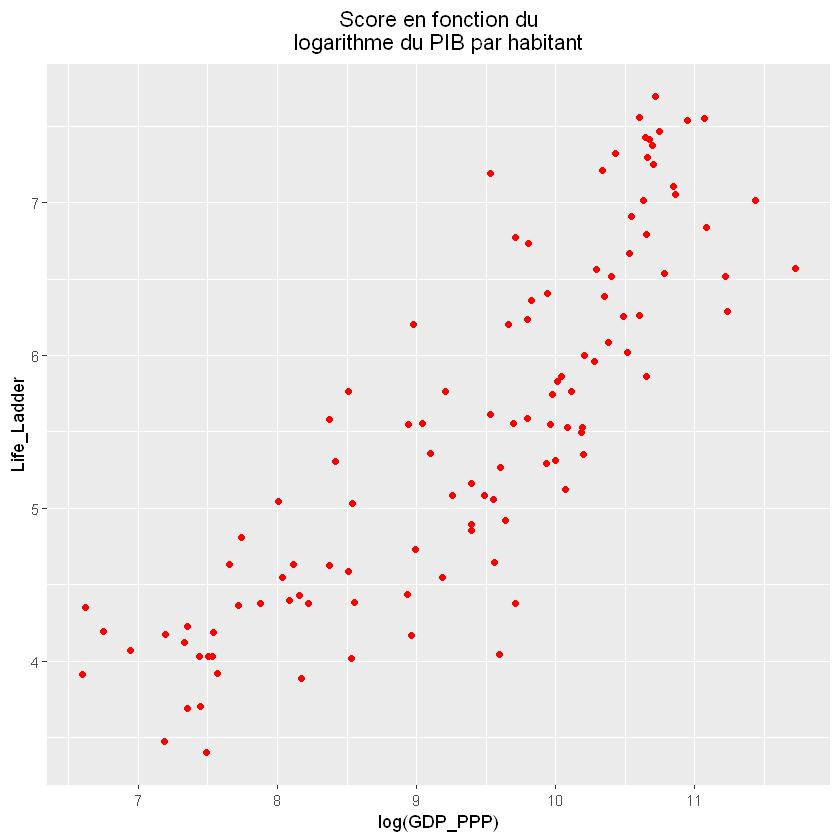

In [52]:
ggplot(data) +
    aes(x = log(GDP_PPP), y = Life_Ladder) +
    geom_point(color = "red") +
    theme(plot.title = element_text(hjust = 0.5)) +
    labs(title = "Score en fonction du\nlogarithme du PIB par habitant")

Modele 1: brut

In [8]:
mod1 <- lm(Life_Ladder~., data = brut[,2:18])
summary(mod1)


Call:
lm(formula = Life_Ladder ~ ., data = brut[, 2:18])

Residuals:
     Min       1Q   Median       3Q      Max 
-0.96724 -0.16694 -0.00461  0.16594  0.76643 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)   
(Intercept)                   2.983e+02  2.175e+02   1.372  0.17783   
Year                         -1.499e-01  1.084e-01  -1.383  0.17434   
GDP_PPP                       2.136e-05  1.088e-05   1.963  0.05666 . 
Social_support                2.601e+00  9.820e-01   2.649  0.01151 * 
HALE_birth                    4.227e-02  2.069e-02   2.043  0.04769 * 
Freedom                       1.826e+00  9.173e-01   1.990  0.05342 . 
Generosity                    8.012e-01  4.944e-01   1.620  0.11298   
Corruption                   -9.952e-01  6.060e-01  -1.642  0.10837   
Positive_affect               1.305e+00  9.919e-01   1.316  0.19564   
Negative_affect               3.355e+00  1.203e+00   2.789  0.00805 **
Confidence_government        -5.540e-01  4

On garde:
- Les variables fortement corrélés à Y (Life_ladder)
- Parmis ceux corrélées entre elles, uniquement la plus corrélée à Y


Donc on supprime:
- `Democratic_Quality` pour garder `Delivery_Quality`
- `GINI 2000-16` pour garder `GINI household`
- Les `Trust_people` pour garder `Trust_people_2005-2009`


On effectue une régression sur les variables restantes


**MODELE 2**

In [9]:
donnees2 <- brut[,-c(12,14,16,18)]

In [10]:
mod2 <- lm(Life_Ladder~., data = donnees2[,2:14])
summary(mod2)


Call:
lm(formula = Life_Ladder ~ ., data = donnees2[, 2:14])

Residuals:
     Min       1Q   Median       3Q      Max 
-1.79988 -0.39034  0.00855  0.39431  1.23404 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          8.105e+01  1.572e+02   0.516  0.60693    
Year                -4.125e-02  7.823e-02  -0.527  0.59879    
GDP_PPP              1.774e-05  6.348e-06   2.794  0.00593 ** 
Social_support       1.655e+00  6.244e-01   2.650  0.00897 ** 
HALE_birth           4.634e-02  1.051e-02   4.411 2.03e-05 ***
Freedom             -1.441e-01  5.143e-01  -0.280  0.77974    
Generosity          -1.152e-01  3.800e-01  -0.303  0.76214    
Corruption          -7.161e-01  4.778e-01  -1.499  0.13617    
Positive_affect      3.594e+00  7.983e-01   4.502 1.40e-05 ***
Negative_affect      1.641e+00  8.189e-01   2.004  0.04703 *  
Democratic_Quality  -6.286e-02  9.180e-02  -0.685  0.49464    
GINI_02_18_WB        9.383e-01  8.624e-01   1.088  0.27844    


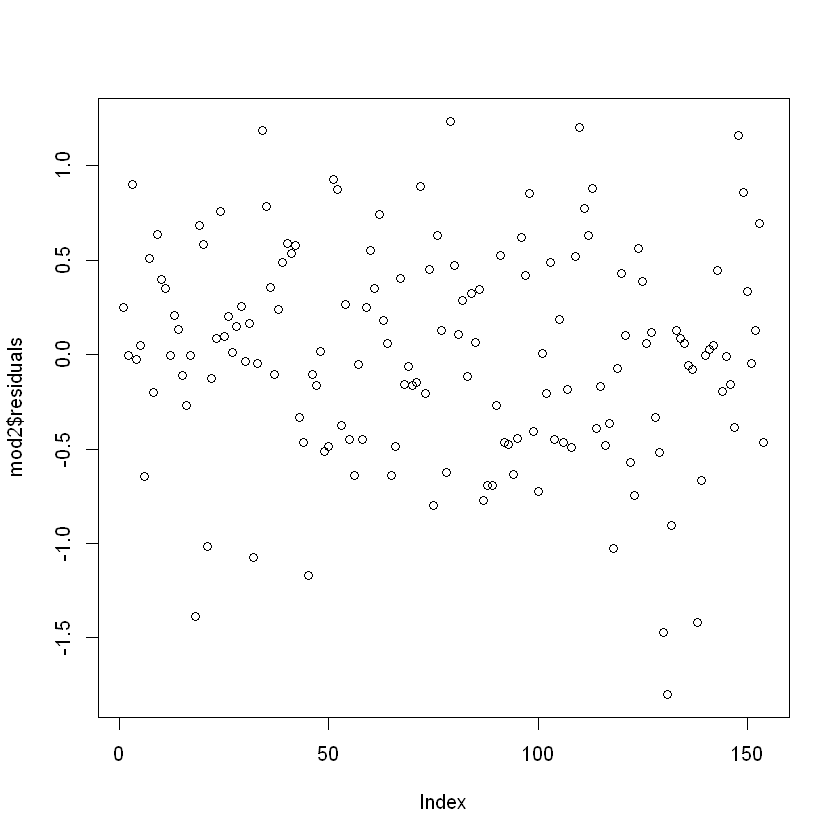

In [11]:
plot(mod2$residuals)